# Beyond Linear Regression: Polynomial Features Activity

## Introduction

Linear regression is a powerful tool, but it has limitations when dealing with non-linear relationships in data. In this activity, we'll explore:

1. How linear regression performs on non-linear data
2. How polynomial regression can capture non-linear patterns
3. How to compare models using R² and other metrics

This activity builds on Day 1's linear regression concepts while introducing more advanced modeling techniques.

## Setup

First, let's import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Set up matplotlib for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Part 1: Generate Non-Linear Data

Let's create a dataset with a quadratic relationship (y = x² + noise):

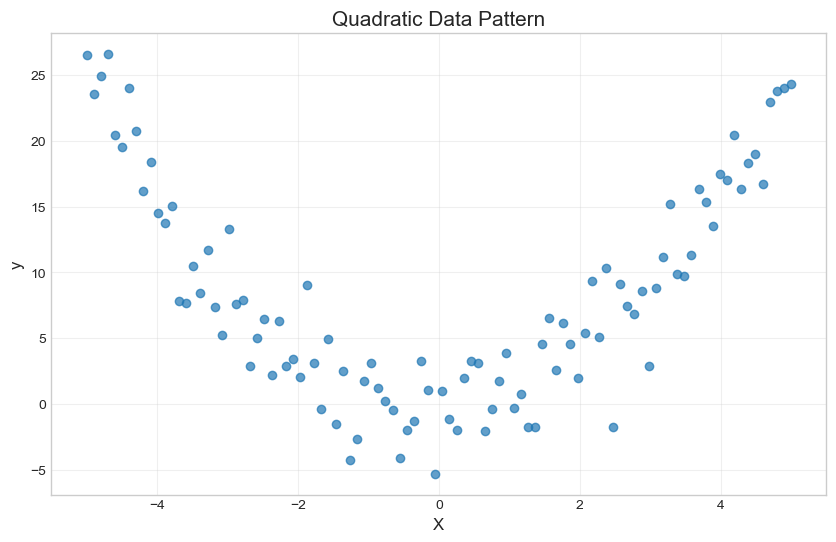

Does this look like a linear relationship? Why or why not?


In [2]:
# Generate x values
X = np.linspace(-5, 5, 100).reshape(-1, 1)

# Generate y values with a quadratic relationship: y = x² + noise
y = X**2 + np.random.normal(0, 3, size=X.shape)

# Create a pandas DataFrame for easier manipulation
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['y'], alpha=0.7)
plt.title('Quadratic Data Pattern', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("Does this look like a linear relationship? Why or why not?")

## Part 2: Fit a Linear Regression Model

Now, let's try to fit a linear regression model to this non-linear data:

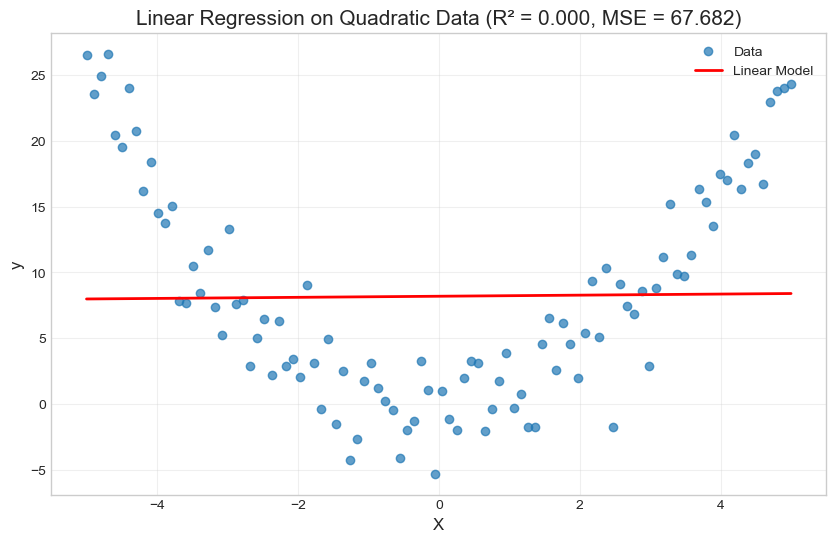

Linear Regression Equation: y = 8.190 + 0.041 * X
R² Score: 0.000
Mean Squared Error: 67.682


In [3]:
# Create and fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Make predictions
y_pred_linear = linear_model.predict(X)

# Calculate metrics
r2_linear = r2_score(y, y_pred_linear)
mse_linear = mean_squared_error(y, y_pred_linear)

# Plot the data and the linear model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X, y_pred_linear, color='red', linewidth=2, label='Linear Model')
plt.title(f'Linear Regression on Quadratic Data (R² = {r2_linear:.3f}, MSE = {mse_linear:.3f})', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Linear Regression Equation: y = {linear_model.intercept_[0]:.3f} + {linear_model.coef_[0][0]:.3f} * X")
print(f"R² Score: {r2_linear:.3f}")
print(f"Mean Squared Error: {mse_linear:.3f}")

### Discussion Question

1. Why does the linear model perform poorly on this data?
2. What does the R² value tell us about the fit?
3. Can you think of real-world scenarios where relationships might be non-linear?

## Part 3: Polynomial Regression

Let's try polynomial regression to capture the non-linear relationship:

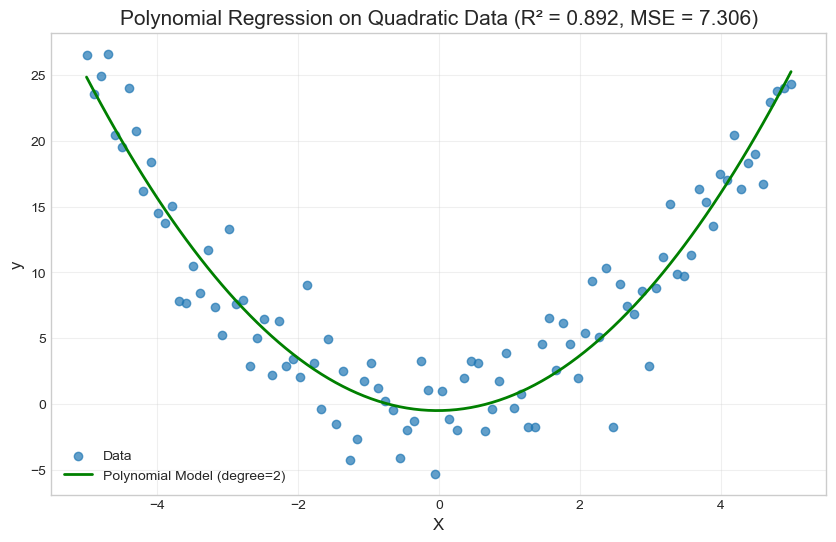

R² Score: 0.892
Mean Squared Error: 7.306


In [4]:
# Create polynomial features of degree 2
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the polynomial model
poly_model.fit(X, y)

# Make predictions
y_pred_poly = poly_model.predict(X)

# Calculate metrics
r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

# Sort X and corresponding predictions for smooth curve plotting
sort_idx = np.argsort(X.flatten())
X_sorted = X[sort_idx]
y_pred_poly_sorted = y_pred_poly[sort_idx]

# Plot the data and the polynomial model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X_sorted, y_pred_poly_sorted, color='green', linewidth=2, label='Polynomial Model (degree=2)')
plt.title(f'Polynomial Regression on Quadratic Data (R² = {r2_poly:.3f}, MSE = {mse_poly:.3f})', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"R² Score: {r2_poly:.3f}")
print(f"Mean Squared Error: {mse_poly:.3f}")

## Part 4: Compare Linear and Polynomial Models

Let's visualize both models together to see the difference:

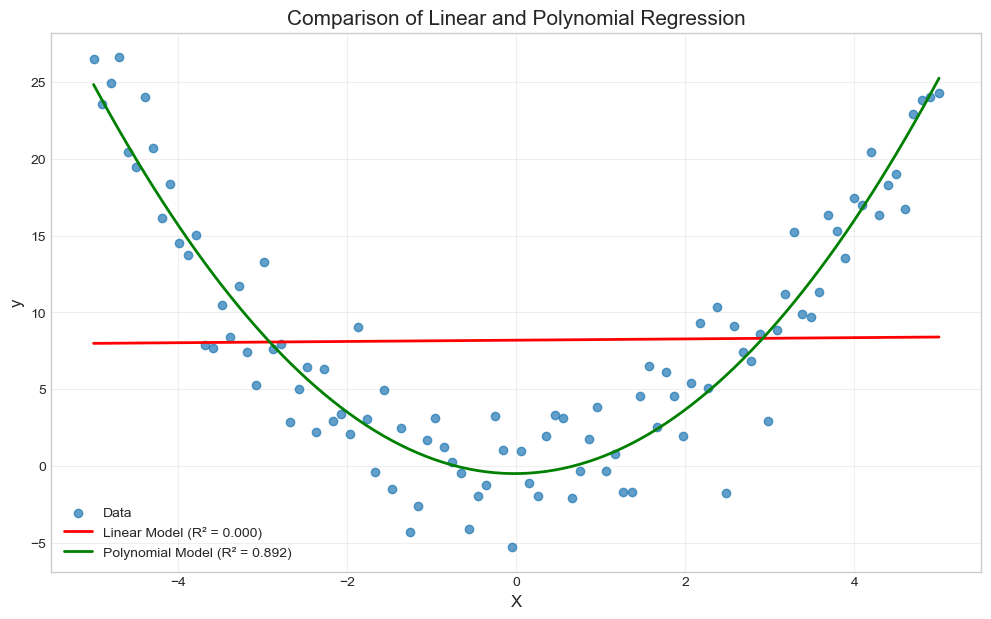

,Model,R² Score,Mean Squared Error
0,Linear Regression,0.000215,67.682061
1,Polynomial Regression (degree=2),0.892075,7.306188


In [5]:
# Plot both models together
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X, y_pred_linear, color='red', linewidth=2, label=f'Linear Model (R² = {r2_linear:.3f})')
plt.plot(X_sorted, y_pred_poly_sorted, color='green', linewidth=2, label=f'Polynomial Model (R² = {r2_poly:.3f})')
plt.title('Comparison of Linear and Polynomial Regression', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Create a comparison table
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (degree=2)'],
    'R² Score': [r2_linear, r2_poly],
    'Mean Squared Error': [mse_linear, mse_poly]
})

comparison

## Part 5: Experiment with Higher Degree Polynomials

Let's see what happens when we increase the polynomial degree:

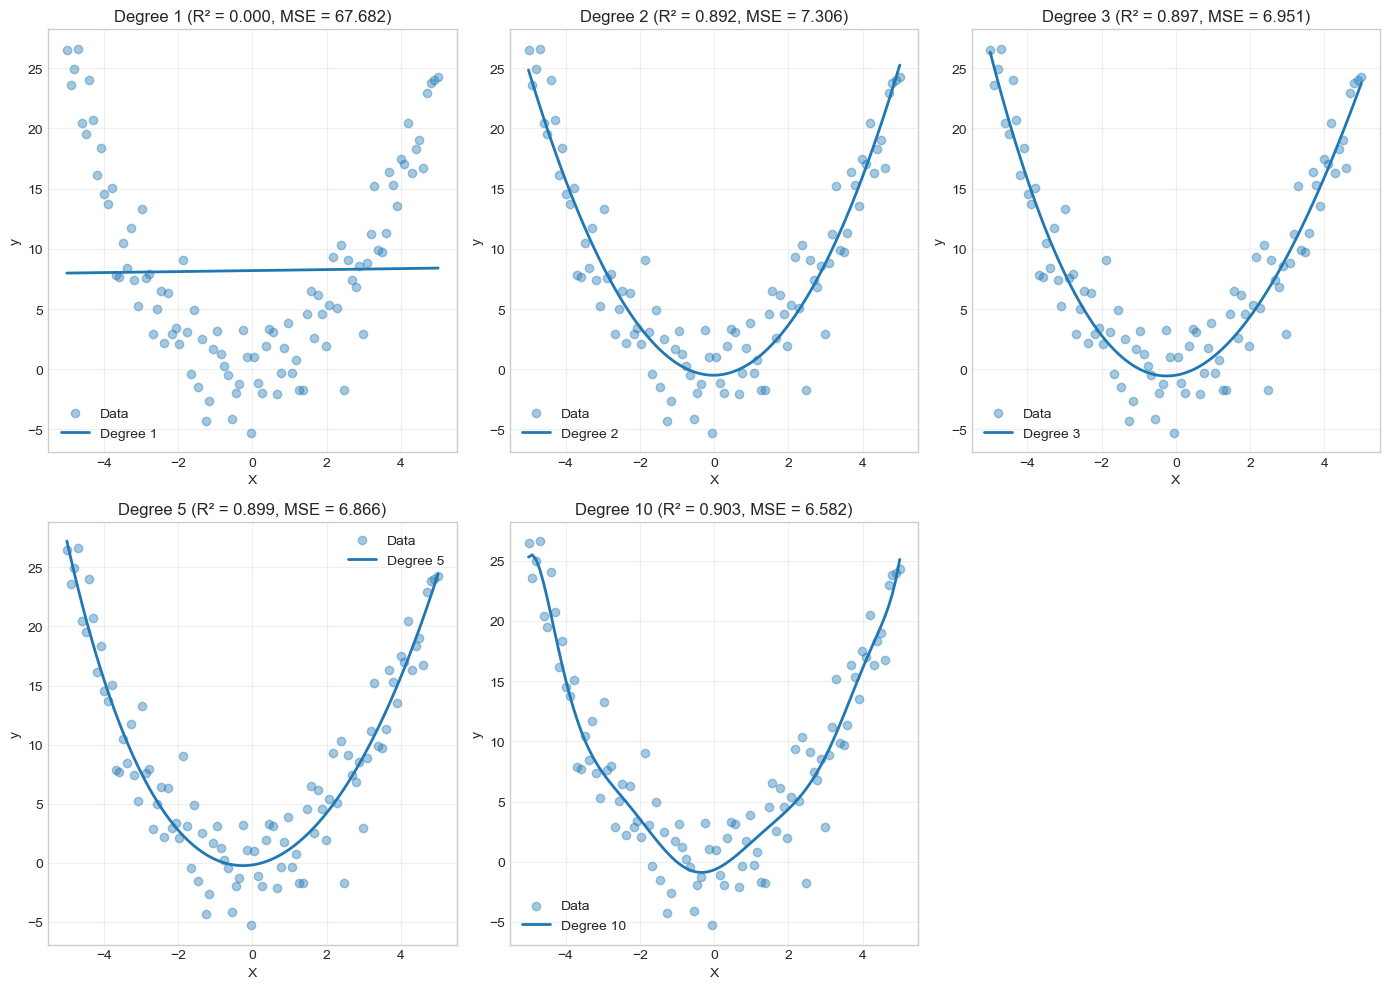

,Polynomial Degree,R² Score,Mean Squared Error
0,1,0.000215,67.682061
1,2,0.892075,7.306188
2,3,0.897319,6.951188
3,5,0.898574,6.866217
4,10,0.902777,6.581686


In [6]:
# Create a function to fit polynomial models of different degrees
def fit_polynomial_model(X, y, degree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return model, y_pred, r2, mse

# Fit models with different degrees
degrees = [1, 2, 3, 5, 10]
models = {}
plt.figure(figsize=(14, 10))

for i, degree in enumerate(degrees):
    model, y_pred, r2, mse = fit_polynomial_model(X, y, degree)
    models[degree] = (model, y_pred, r2, mse)
    
    # Sort for smooth curve plotting
    sort_idx = np.argsort(X.flatten())
    X_sorted = X[sort_idx]
    y_pred_sorted = y_pred[sort_idx]
    
    # Plot in a subplot
    plt.subplot(2, 3, i+1)
    plt.scatter(X, y, alpha=0.4, label='Data')
    plt.plot(X_sorted, y_pred_sorted, linewidth=2, label=f'Degree {degree}')
    plt.title(f'Degree {degree} (R² = {r2:.3f}, MSE = {mse:.3f})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True, alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.show()

# Create a comparison table for all models
comparison_all = pd.DataFrame({
    'Polynomial Degree': degrees,
    'R² Score': [models[d][2] for d in degrees],
    'Mean Squared Error': [models[d][3] for d in degrees]
})

comparison_all

## Discussion Questions

1. What happens to the R² score as the polynomial degree increases?
2. What happens to the model fit as the polynomial degree increases?
3. Is a higher degree always better? Why or why not?
4. What is the risk of using a very high-degree polynomial?

## Part 6: Overfitting with High-Degree Polynomials

Let's demonstrate overfitting by splitting our data into training and testing sets:

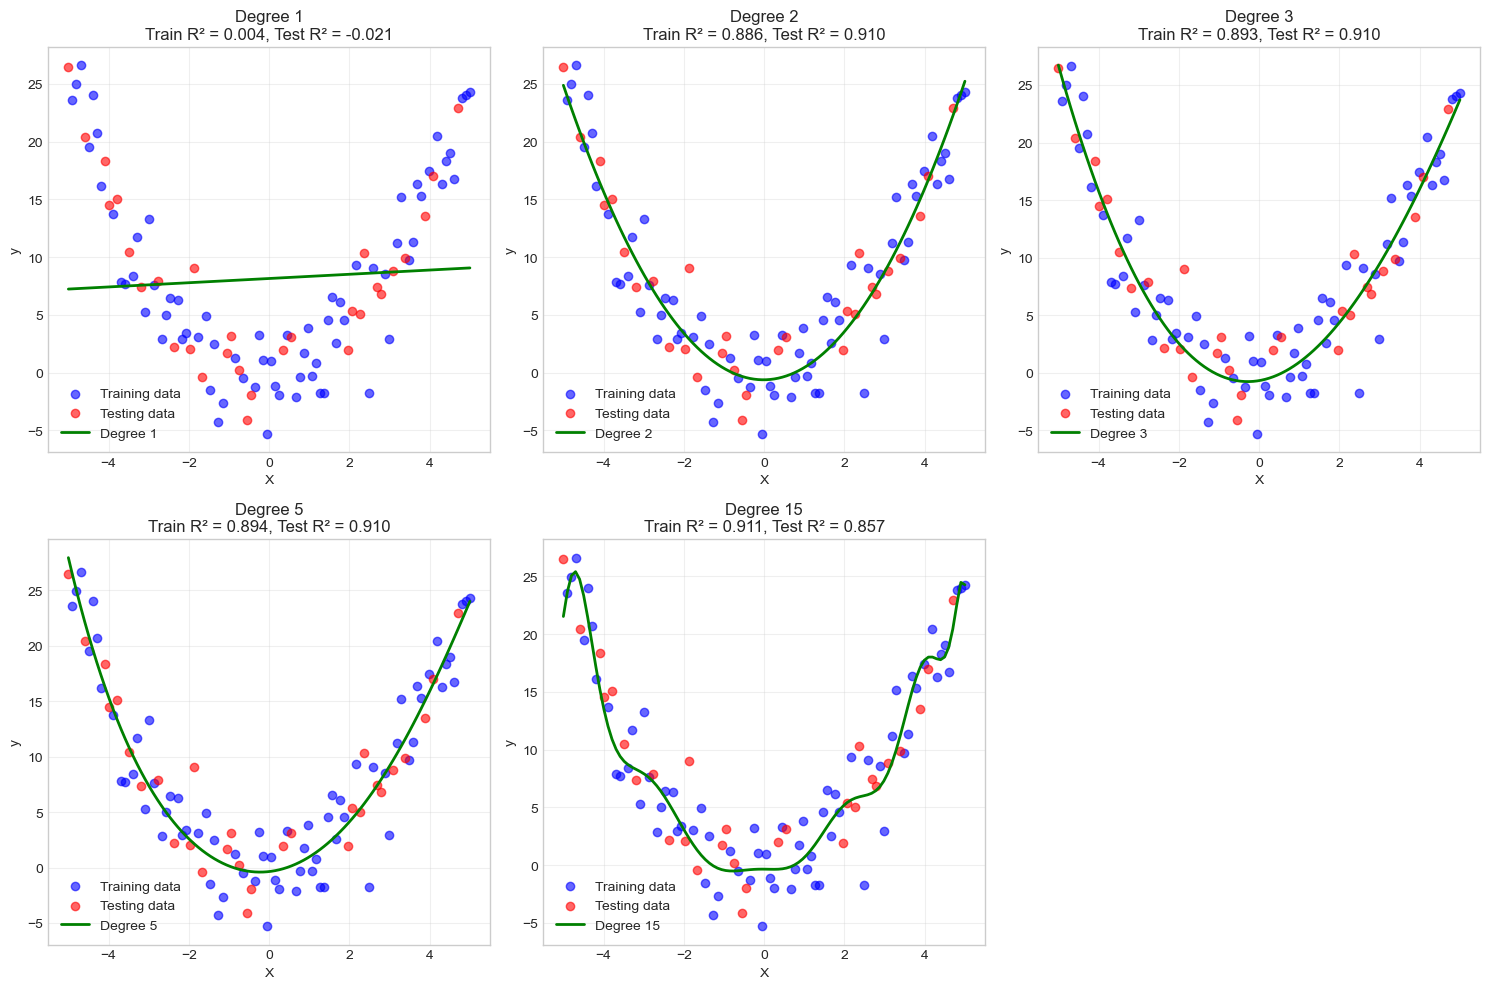

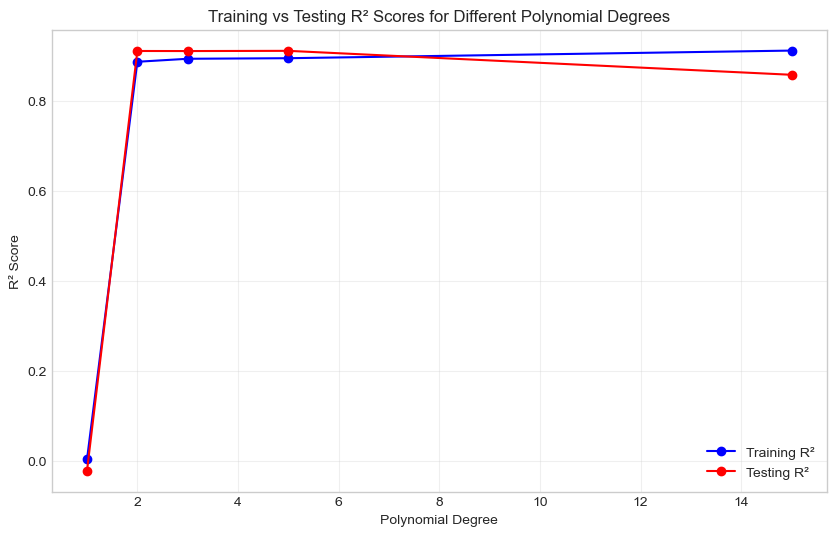

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Degrees to test
degrees = [1, 2, 3, 5, 15]

# Create a figure
plt.figure(figsize=(15, 10))

# Store results
train_scores = []
test_scores = []

for i, degree in enumerate(degrees):
    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    
    # Sort for smooth curve plotting
    sort_idx = np.argsort(X.flatten())
    X_sorted = X[sort_idx]
    y_pred_sorted = model.predict(X_sorted)
    
    # Plot in a subplot
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training data')
    plt.scatter(X_test, y_test, alpha=0.6, color='red', label='Testing data')
    plt.plot(X_sorted, y_pred_sorted, color='green', linewidth=2, label=f'Degree {degree}')
    plt.title(f'Degree {degree}\nTrain R² = {train_r2:.3f}, Test R² = {test_r2:.3f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True, alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.show()

# Plot training vs testing R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', color='blue', label='Training R²')
plt.plot(degrees, test_scores, 'o-', color='red', label='Testing R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Training vs Testing R² Scores for Different Polynomial Degrees')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Key Takeaways

1. **Linear regression has limitations** when dealing with non-linear relationships in data
2. **Polynomial regression** can capture non-linear patterns by adding polynomial features
3. **R² score improves** as we increase the polynomial degree, but this can lead to overfitting
4. **Overfitting** occurs when a model performs well on training data but poorly on testing data
5. **Model selection** should balance complexity with generalization ability

## Real-World Applications

Many real-world relationships are non-linear, such as:
- Economic growth and interest rates
- Dose-response curves in medicine
- Population growth over time
- Learning curves in education
- Physical phenomena like gravity, springs, etc.
